In [1]:
###################################################################################################
############################################# MODULES #############################################
###################################################################################################
from typing import IO

import numpy as np
import pandas as pd
import random

import csv

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

In [2]:
###################################################################################################
########################################### DATAS IMPORT ##########################################
###################################################################################################

In [3]:
with open('Datasets/Dataset_1_test.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X1_test = data[:, 0]
    y1_test = data[:, 1]

with open('Datasets/Dataset_1_train.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X1_train = data[:, 0]
    #X1_train = (X1_train - min(X1_train))/(max(X1_train) - min(X1_train))
    X1_train / np.linalg.norm(X1_train)
    y1_train = data[:, 1]

with open('Datasets/Dataset_1_valid.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X1_valid = data[:, 0]
    #X1_valid = (X1_valid - min(X1_valid))/(max(X1_valid) - min(X1_valid))
    X1_valid / np.linalg.norm(X1_valid)
    y1_valid = data[:, 1]

with open('Datasets/Dataset_2_test.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X2_test = data[:, 0]
    X2_test / np.linalg.norm(X2_test)
    y2_test = data[:, 1]

with open('Datasets/Dataset_2_train.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X2_train = data[:, 0]
    X2_train / np.linalg.norm(X1_train)
    y2_train = data[:, 1]

with open('Datasets/Dataset_2_valid.csv') as csvfile:
    data = np.array(list(csv.reader(csvfile)))
    data = data[:, :2].astype(np.float64)
    X2_valid = data[:, 0]
    X2_valid / np.linalg.norm(X1_valid)
    y2_valid = data[:, 1]

In [4]:
names = pd.read_csv('Datasets/attributes.csv', delim_whitespace=True)
data = pd.read_csv('Datasets/communities.data', names=names['names']).replace('?', np.NaN)

In [5]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [6]:
data.shape

(1994, 128)

In [7]:
###################################################################################################
########################################## DATA SELECTION #########################################
###################################################################################################
data = data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)
data = data.astype('float')
missing_features = data.columns[data.isnull().any()]

In [8]:
missing_features = data.columns[data.isnull().any()]
missing_features.shape

(23,)

In [9]:
data[missing_features].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,1993.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.284742,0.069655,0.217461,0.924734,0.246332,0.097994,0.215204,0.343636,0.217492,0.689404,...,0.114859,0.259185,0.075549,0.556050,0.305987,0.163103,0.076708,0.698589,0.440439,0.195078
std,0.191008,0.138238,0.159928,0.132249,0.155045,0.161927,0.164622,0.197181,0.159941,0.226811,...,0.227348,0.225655,0.120153,0.203178,0.226884,0.214778,0.140207,0.213944,0.405808,0.164718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,0.010000,0.130000,0.930000,0.160000,0.020000,0.120000,0.220000,0.130000,0.560000,...,0.000000,0.090000,0.020000,0.430000,0.140000,0.040000,0.020000,0.620000,0.000000,0.110000
50%,0.250000,0.020000,0.180000,0.970000,0.210000,0.040000,0.170000,0.290000,0.180000,0.740000,...,0.000000,0.200000,0.040000,0.570000,0.260000,0.080000,0.030000,0.750000,0.500000,0.150000
75%,0.360000,0.060000,0.250000,0.980000,0.290000,0.085000,0.250000,0.435000,0.250000,0.860000,...,0.120000,0.350000,0.080000,0.675000,0.395000,0.195000,0.060000,0.840000,1.000000,0.220000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
data['OtherPerCap'] = data['OtherPerCap'].replace(np.nan, data['OtherPerCap'].mean())

0       0.36
1       0.22
2       0.28
3       0.36
4       0.51
        ... 
1989    0.36
1990    0.23
1991    0.22
1992    0.27
1993    0.25
Name: OtherPerCap, Length: 1994, dtype: float64

In [18]:
missing_features = data.columns[data.isnull().any()]
missing_features.shape

(23,)

In [10]:
def MSE(y_pred, y):
    return np.square(y_pred - y).mean()

In [11]:

############################################ FUNCTIONS EXO 1 ############################################

class PolyReg20:
    def __init__(self, epochs=30, lr = 0.95, l2=0):
        self.w = np.zeros(21)
        self.epochs = epochs
        self.l2 = l2
        self.lr = lr

    def transform(self, X):
        vandermonde = np.ones((50, 1))
        for j in range(1, 21):
            x_pow = np.power(X, j)
            vandermonde = np.append(vandermonde, x_pow.reshape(-1, 1), axis=1)
        return vandermonde

    def predict(self, X):
        return self.transform(X) @ self.w

    def fit(self, X, y):
        N = len(X)
        vandermonde = self.transform(X)
        for i in range(self.epochs):
            y_pred = self.predict(X)
            error = y_pred - y
            dw = (1/N) * (vandermonde.T @ error)
            ridge = (1/N) * (self.l2 * self.w)
            self.w = self.w - (self.lr * dw + ridge)

In [12]:
#########################################################################################################
################################################# EXO 1 #################################################
#########################################################################################################
model = PolyReg20()
model.fit(X1_train, y1_train)

y1_valid_pred_L2s, y1_train_pred_L2s = [], []
MSE_valids, MSE_trains = [], []

y1_valid_pred = model.predict(X1_valid)
y1_train_pred = model.predict(X1_train)

MSE_valid = MSE(y1_valid_pred, y1_valid)
MSE_train = MSE(y1_train_pred, y1_train)

############################################### L2 ################################################

N = 100
for i in range(N+1):
    model = PolyReg20(l2=i/N)
    model.fit(X1_train, y1_train)

    y1_valid_pred_L2 = model.predict(X1_valid)
    y1_train_pred_L2 = model.predict(X1_train)

    y1_valid_pred_L2s.append(y1_valid_pred_L2)
    y1_train_pred_L2s.append(y1_train_pred_L2)

    MSE_valids.append(MSE(y1_valid_pred_L2, y1_valid))
    MSE_trains.append(MSE(y1_train_pred_L2, y1_train))

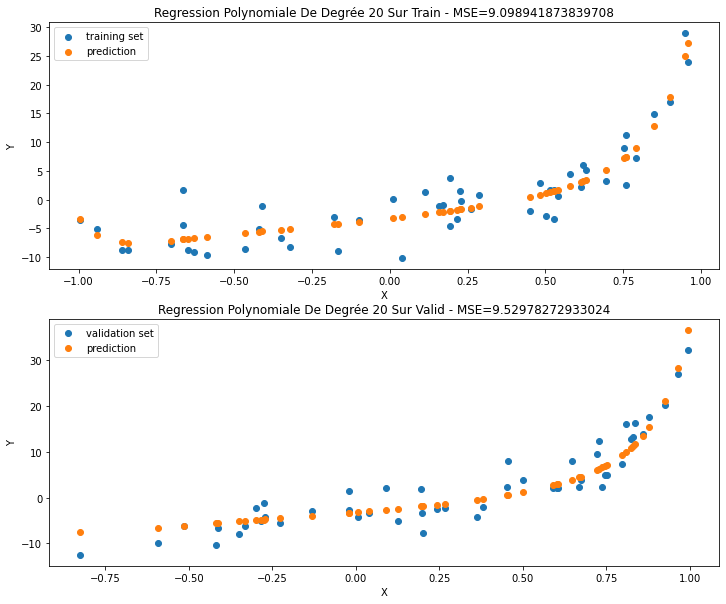

NameError: name 'L2_factors' is not defined

In [13]:
############################################# GRAPHS ##############################################
figure, axis = plt.subplots(2, 1)

axis[0].scatter(X1_train, y1_train, label='training set')
axis[0].scatter(X1_train, y1_train_pred, label='prediction')
axis[0].legend()
axis[0].set_xlabel("X")
axis[0].set_ylabel("Y")
axis[0].set_title(
    f'Regression Polynomiale De Degrée 20 Sur Train - MSE={MSE_train}')

axis[1].scatter(X1_valid, y1_valid, label='validation set')
axis[1].scatter(X1_valid, y1_valid_pred, label='prediction')
axis[1].legend()
axis[1].set_xlabel("X")
axis[1].set_ylabel("Y")
axis[1].set_title(
    f'Regression Polynomiale De Degrée 20 Sur Valid - MSE={MSE_valid}')
plt.show()

############################################### L2 ################################################
plt.scatter(L2_factors, MSE_valids, label='validation set')
plt.scatter(L2_factors, MSE_trains, label='train set')
plt.legend()
plt.title(f'MSE en fonction de l\'hyperparametre $lambda$ avec régularisation')
plt.xlabel('$lambda$')
plt.ylabel('MSE')
plt.show()

In [403]:
model = PolyReg20(l2 = 0.02, lr = 0.95, epochs = 30)
model.fit(X1_train, y1_train)
y_test_pred = model.predict(X1_test)
mse_test = MSE(y_test_pred, y1_test)

print(mse_test)

10.486879964777879


In [406]:
#########################################################################################################
############################################ FUNCTIONS EXO 2 ############################################
#########################################################################################################
class LinearReg:
    def __init__(self, epochs=20, learning_rate=1e-6, X_valid=[], y_valid=[]):
        #y = a*x + b
        self.a = 0
        self.b = 0
        self.epochs = epochs
        self.lr = learning_rate
        self.MSE_global = list()
        self.X_valid = X_valid
        self.y_valid = y_valid

    def predict(self, X):
        return self.a*X + self.b

    def MSE(self, y_pred, y):
        return np.square(y_pred - y).mean()

    def SGD(self, X, y):
        MSE_tmp = list()
        for epoch in range(self.epochs):
            y_pred = self.predict(X)

            error = y_pred - y

            grad_a = X*error/self.N
            grad_b = error/self.N

            self.a = self.a - self.lr * grad_a
            self.b = self.b - self.lr * grad_b

            MSE = self.MSE(y_pred, y)
            MSE_tmp.append(MSE)
            #print(f'    Epoch: {epoch+1}/{self.epochs}, MSE={MSE}')

        self.MSE_global.append(MSE_tmp)

    def SGD_plt(self, X, y):
        MSE_tmp = list()
        for epoch in range(self.epochs):
            y_pred = self.predict(X)

            error = y_pred - y

            grad_a = X*error/self.N
            grad_b = error/self.N

            self.a = self.a - self.lr * grad_a
            self.b = self.b - self.lr * grad_b

            MSE = self.MSE(y_pred, y)
            MSE_tmp.append(MSE)

        self.MSE_global.append(MSE_tmp)

    def fit(self, X, y):
        self.N = len(X)
        for Xi, yi, i in zip(X, y, range(self.N)):
            self.SGD(Xi, yi)

    def fit_and_MSE_valid(self, X, y):
        self.N = len(X)
        for Xi, yi, i in zip(X, y, range(self.N)):
            self.SGD(Xi, yi)
            y_pred_valid = self.predict(self.X_valid)
            mse_valid = self.MSE(y_pred_valid, self.y_valid)
            print(
                f"MSE pour le jeu de validation après {i+1} données d'entrainement, 50 epochs par donnée et un pas de {self.lr} = {mse_valid}")

    def fit_and_plot_valid(self, X, y):
        self.N = len(X)
        figure_exo2_2, axis_exo2_2 = plt.subplots(3, 2)
        axis_exo2_2[0][0].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[0][1].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[1][0].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[1][1].scatter(self.X_valid, self.y_valid, label="y_valid")
        axis_exo2_2[2][0].scatter(self.X_valid, self.y_valid, label="y_valid")
        for Xi, yi, i in zip(X, y, range(self.N)):
            self.SGD_plt(Xi, yi)
            y_valid_pred = self.predict(self.X_valid)

            if i == 0:
                axis_exo2_2[0][0].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[0][0].legend()
                axis_exo2_2[0][0].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 75:
                axis_exo2_2[0][1].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[0][1].legend()
                axis_exo2_2[0][1].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 150:
                axis_exo2_2[1][0].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[1][0].legend()
                axis_exo2_2[1][0].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 225:
                axis_exo2_2[1][1].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[1][1].legend()
                axis_exo2_2[1][1].set_title(
                    f"y_pred après entrainement sur {i+1} données")
            elif i == 299:
                axis_exo2_2[2][0].scatter(
                    self.X_valid, y_valid_pred, label="y_pred")
                axis_exo2_2[2][0].legend()
                axis_exo2_2[2][0].set_title(
                    f"y_pred après entrainement sur {i+1} données")
        plt.show()

In [411]:
#########################################################################################################
################################################# EXO 2 #################################################
#########################################################################################################

## QUESTION 1
model = LinearReg(epochs=50, learning_rate=1e-6, X_valid=X2_valid, y_valid=y2_valid)
model.fit_and_MSE_valid(X2_train, y2_train)
y2_train_pred = model.predict(X2_train)
y2_train_MSE = MSE(y2_train_pred, y2_train)

y2_valid_pred = model.predict(X2_valid)
y2_valid_MSE = MSE(y2_valid_pred, y2_valid)

print("\nOn remarque que le MSE diminue plus le nombre de données d'entrainement est grand, cependant le pas semble trop petit pour voir une nette diminution de la MSE")

MSE pour le jeu de validation après 1 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.40123867474683
MSE pour le jeu de validation après 2 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.40121726690856
MSE pour le jeu de validation après 3 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.40118799757583
MSE pour le jeu de validation après 4 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.401162078613844
MSE pour le jeu de validation après 5 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.40111545090366
MSE pour le jeu de validation après 6 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.40110696146829
MSE pour le jeu de validation après 7 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.4010971029813
MSE pour le jeu de validation après 8 données d'entrainement, 50 epochs par donnée et un pas de 1e-06 = 50.401069665636214
MSE pour le jeu de vali

Jeu de validation, Epochs = 50, Pas = 0.2 --> MSE = 0.15091476127939654
Jeu de validation, Epochs = 50, Pas = 0.25 --> MSE = 0.1392812042738975
Jeu de validation, Epochs = 50, Pas = 0.3 --> MSE = 0.12914817282807017
Jeu de validation, Epochs = 50, Pas = 0.35 --> MSE = 0.12044286000147966
Jeu de validation, Epochs = 50, Pas = 0.4 --> MSE = 0.11312945925322354
Jeu de validation, Epochs = 50, Pas = 0.45 --> MSE = 0.10709823684750683
Jeu de validation, Epochs = 50, Pas = 0.5 --> MSE = 0.10219764373938563
Jeu de validation, Epochs = 50, Pas = 0.55 --> MSE = 0.09826669007071814
Jeu de validation, Epochs = 50, Pas = 0.6 --> MSE = 0.0951539762410805
Jeu de validation, Epochs = 50, Pas = 0.65 --> MSE = 0.09272623424281172
Jeu de validation, Epochs = 50, Pas = 0.7 --> MSE = 0.09087060867572161
Jeu de validation, Epochs = 50, Pas = 0.75 --> MSE = 0.0894937193576588
Jeu de validation, Epochs = 50, Pas = 0.8 --> MSE = 0.08851933289164425
Jeu de validation, Epochs = 50, Pas = 0.85 --> MSE = 0.087885

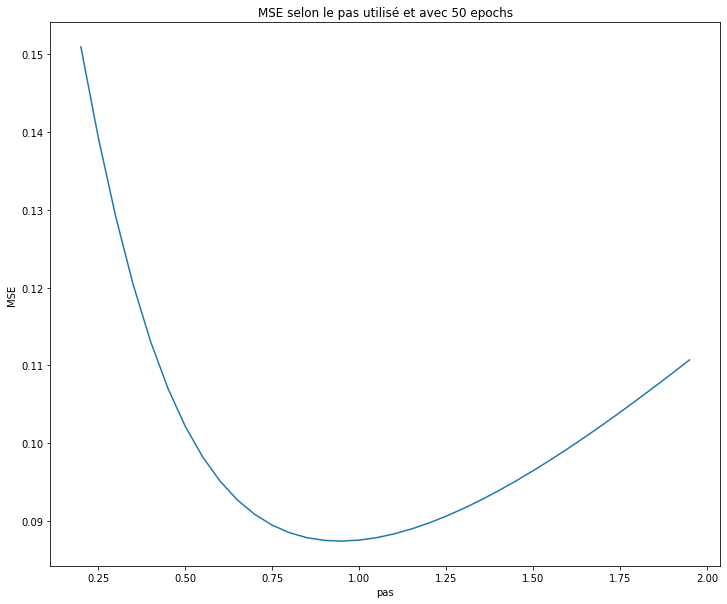

In [412]:
## QUESTION 2
pas = [i/100 for i in range(20, 200, 5)]
_MSE = []
for i in pas:
    model = LinearReg(learning_rate=i, X_valid=X2_valid, y_valid=y2_valid)
    model.fit(X2_train, y2_train)

    y2_valid_pred = model.predict(X2_valid)
    y2_valid_MSE = MSE(y2_valid_pred, y2_valid)

    _MSE.append(y2_valid_MSE)

for i in range(len(pas)):
    print(f"Jeu de validation, Epochs = 50, Pas = {pas[i]} --> MSE = {_MSE[i]}")

figure_exo2_1, axis_exo2_1 = plt.subplots(1, 1)
axis_exo2_1.plot(pas, _MSE)
axis_exo2_1.set_xlabel("pas")
axis_exo2_1.set_ylabel("MSE")
axis_exo2_1.set_title("MSE selon le pas utilisé et avec 50 epochs")
plt.show()

In [415]:

print("\nLe pas qui nous donne la MSE la plus faible est 0.95, nous le garderons donc par la suite.")
print("-----")
modelFinal = LinearReg(epochs=50, learning_rate=0.95,
                        X_valid=X2_valid, y_valid=y2_valid)
modelFinal.fit(X2_train, y2_train)

y2_valid_pred = modelFinal.predict(X2_valid)
y2_valid_MSE = MSE(y2_valid_pred, y2_valid)
print(f"La MSE du jeu de test pour le modèle final avec 50 epochs et un pas de 0.95 est de : {y2_valid_MSE}")


Le pas qui nous donne la MSE la plus faible est 0.95, nous le garderons donc par la suite.
-----
La MSE du jeu de test pour le modèle final avec 50 epochs et un pas de 0.95 est de : 0.125660896919803


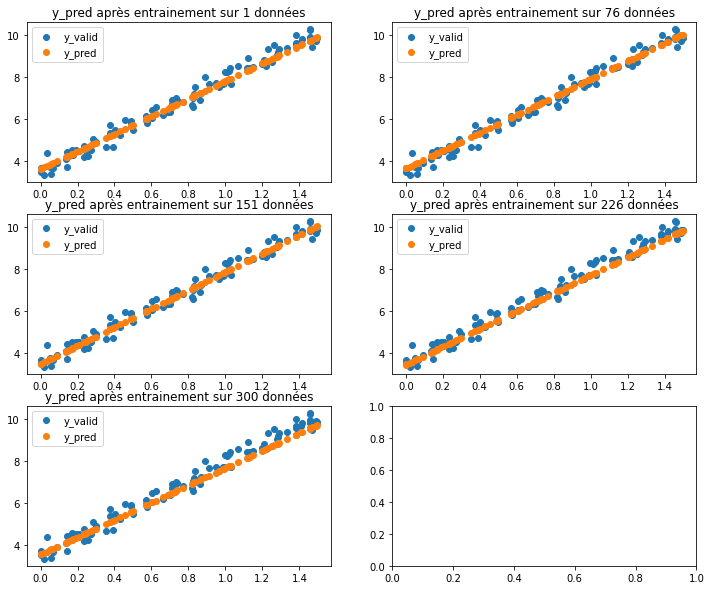

En utilisant 50 epoch, notre modèle ne peut pas apprendre assez bien sur une seule donnée comme il le fait avec 50 epoch où il predit très bien les données avec une seule donnée. Cependant observer le modèle en utilisant 1 seule epoch nous permet de voir comment ce dernier s'ajuste aux données au fur et à mesure de l'entraimenet.


In [188]:
## QUESTION 3
modelFinal.fit_and_plot_valid(X2_train, y2_train)

print("En utilisant 50 epoch, notre modèle ne peut pas apprendre assez bien sur une seule donnée comme il le fait avec 50 epoch où il predit très bien les données avec une seule donnée. Cependant observer le modèle en utilisant 1 seule epoch nous permet de voir comment ce dernier s'ajuste aux données au fur et à mesure de l'entraimenet.")

Cependant il est difficille de voir l'évolution au fur et à mesure car le modèle apprend bien avec 50 epochs. Nous allons utiliser 1 epoch maintenant pour bien visualiser l'apprentissage de notre modèle, ce dernier sera donc moins performant qu'avec 50 epochs et n'est pas notre modèle final.


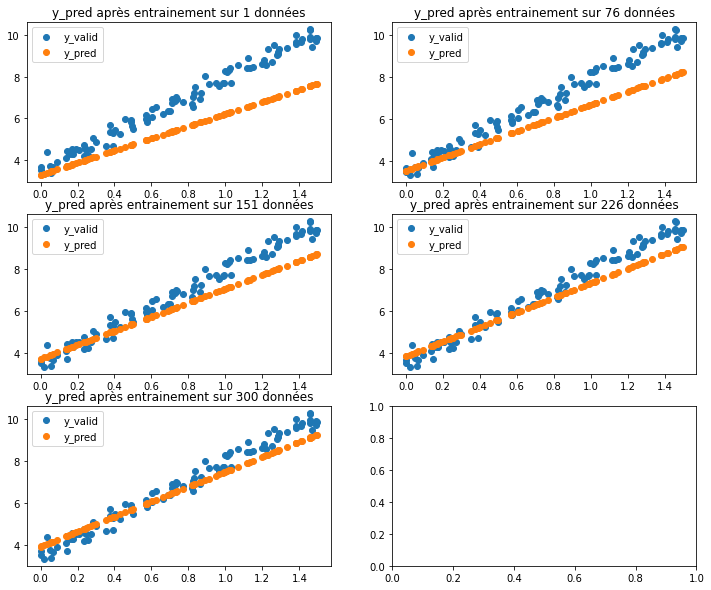

In [189]:
print("Cependant il est difficille de voir l'évolution au fur et à mesure car le modèle apprend bien avec 50 epochs. Nous allons utiliser 1 epoch maintenant pour bien visualiser l'apprentissage de notre modèle, ce dernier sera donc moins performant qu'avec 50 epochs et n'est pas notre modèle final.")

model1Epoch = LinearReg(epochs=1, learning_rate=0.95,
                        X_valid=X2_valid, y_valid=y2_valid)
model1Epoch.fit(X2_train, y2_train)

y2_valid_pred = model1Epoch.predict(X2_valid)
y2_valid_MSE = MSE(y2_valid_pred, y2_valid)

model1Epoch.fit_and_plot_valid(X2_train, y2_train)



In [190]:
############################################ Fonctions Exo 3 ############################################

def train_test_split_kfold(dataset, split=0.8):
    random.seed(1)
    train = list()
    train_size = 0.8 * len(data)
    test = np.array(data)

    while len(train) < train_size:
        data_cp_len = len(test)
        index = random.randrange(0, data_cp_len)
        train.append(test[index])
        test = np.delete(test, index, 0)

    train1 = []
    train2 = []
    train3 = []
    train4 = []
    train5 = []
    test1 = []
    test2 = []
    test3 = []
    test4 = []
    test5 = []

    train_size = len(train)
    test_size = len(test)

    index = 0
    while(index < train_size):
        tab = index % 5
        if(tab == 0):
            train1.append(train[index])
        elif(tab == 1):
            train2.append(train[index])
        elif(tab == 2):
            train3.append(train[index])
        elif(tab == 3):
            train4.append(train[index])
        else:
            train5.append(train[index])
        index += 1

    index = 0
    while(index < test_size):
        tab = index % 5
        if(tab == 0):
            test1.append(test[index])
        elif(tab == 1):
            test2.append(test[index])
        elif(tab == 2):
            test3.append(test[index])
        elif(tab == 3):
            test4.append(test[index])
        else:
            test5.append(test[index])
        index += 1

    train = [np.array(train1), np.array(train2), np.array(train3), np.array(train4), np.array(train5)]
    test = [np.array(test1), np.array(test2), np.array(test3), np.array(test4), np.array(test5)]

    return train, test


class RidgeRegression():
    def __init__(self, learning_rate = 0.001, epochs = 100, l2 = 0):
        self.lr = learning_rate
        self.epochs = epochs
        self.l2 = l2

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.epochs):
            self.ridge_gradient()

    def ridge_gradient(self):
        y_pred = self.predict(self.X)

        error = y_pred - self.y

        d_w = ((self.X.T @ error) + self.l2*self.w)/self.m
        d_b = np.sum(error)/self.m

        self.w = self.w - self.lr * d_w
        self.b = self.b - self.lr * d_b

    def predict(self, X):
        return X @ self.w + self.b

    def MSE(self):
        return np.square(self.y_pred - self.y).mean() 

    def score(self, X, y):
        self.y_pred = self.predict(X)
        self.y = y
        return self.MSE()

def normalize(data):
    for i in range(data.shape[1]):
        mymin = min(data[:,i])
        mymax = max(data[:,i])
        data[:,i] = (data[:,i] - mymin)/(mymax - mymin)
    return data

In [191]:
#########################################################################################################
################################################# EXO 3 #################################################
#########################################################################################################

#On peut utiliser la moyenne de l'échantillon de chaque colonne. Cela nous permet de pouvoir travailler correctement avec les données. Cependant cela implique que nous sous-estimons la variance de nos données.
train, test = train_test_split_kfold(data)

#QUESTION 2

# On choisit un nombre d'epochs = 100 afin que notre modèle apprenne bien sans toutefois surrapprendre nos données
# On choisit un learning_rate de 0.09 qui nous permet d'avoir le MSE le plus faible
mse_kfold_q1 = []
for i in range(len(train)):
    X_train, y_train = train[i][:, :122], train[i][:, 122]
    X_test, y_test = test[i][:, :122], test[i][:, 122]
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    model = RidgeRegression(learning_rate=0.09, epochs = 100)
    model.fit(X_train, y_train)
    mse = model.score(X_test, y_test)
    mse_kfold_q1.append(mse)

    '''X = np.arange(0,320,1)
    y_pred = model.predict(X_train)
    print(X.shape)
    plt.scatter(X, y_train)
    plt.scatter(X, y_pred)
    plt.show()'''

mse_kfold_q1 = np.array(mse_kfold_q1)
mse_mean_q1 = mse_kfold_q1.mean()
print(lr, mse_mean_q1)

1 0.021269959645283713


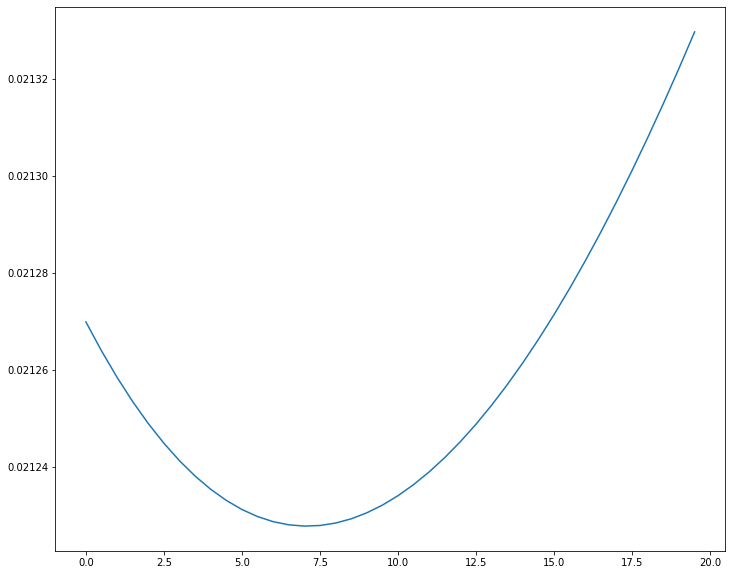

In [192]:
#QUESTION 3

mse_l2 = []
N=100
#L2_factors = [i/N for i in range(N+1)]

L2_factors = np.arange(0,20, 0.5)
for l2_factor in L2_factors:
    mse_kfold_q2 = []
    model = RidgeRegression(learning_rate=0.09, epochs = 100, l2=l2_factor)
    for i in range(len(train)):
        X_train, y_train = train[i][:, :122], train[i][:, 122]
        X_test, y_test = test[i][:, :122], test[i][:, 122]
        X_train = normalize(X_train)
        X_test = normalize(X_test)
        model.fit(X_train, y_train)
        mse = model.score(X_test, y_test)
        mse_kfold_q2.append(mse)
    mse_kfold_q2 = np.array(mse_kfold_q2)
    mse_kfold_mean = mse_kfold_q2.mean()
    mse_l2.append(mse_kfold_mean)

plt.plot(L2_factors, mse_l2)
plt.show()